In [20]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 군집화(Clustering)

군집분석은 대표적인 머신러닝의 비지도 학습. 머신러닝의 분류/회귀와 같이 직접적인 예측을 수행하는 알고리즘은 아니지만, 데이터의 탐색단계 (EDA)에서 데이터간의 군집/패턴등을 시각화하고 이해하는데 유용하고 (이상탐지에도 쓰일 수 있겠다) 전처리 단계에서도 사용될 수 있는데, 예를들어 데이터셋이 우리가 알지 못했던 명확한 특성을 가진 몇가지 군집으로 분류된다면 각 군집별로 개별적인 머신러닝/딥러닝 모델을 학습시키는게 효율적일 수 있음.

1. K-means Clustering 
- 거리기반. 원형의 범위를 가질수록 효율이 높다. (타원형으로 늘어선 경우에 성능이 떨어짐)
- k 사전 지정해야함. k개의 centroid 가 움직이지 않을 때 까지 반복. 
- 변수 개수 많을수록 성능/속도 떨어짐. 
- 주요 파라미터: n_cluster = 중심점 개수, init = 중심점 초기화설정방법, max_iter = 최대반복회수
- 주요 반환값: labels = 각 데이터가 속한 군집 중심점 레이블, cluster_centers_ = 각 중심점의 좌표

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(iris_df.iloc[:,:-1])

print(kmeans.labels_)
print(kmeans.cluster_centers_)

c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [11]:
 # 군집 결과를 DataFrame에 추가한뒤 타겟/군집별 개수세기 
iris_df['target'] = iris.target
iris_df['cluster']=kmeans.labels_
iris_result = iris_df.groupby(['cluster', 'target'])['sepal width (cm)'].count()
print(iris_result)

cluster  target
0        1         48
         2         14
1        0         50
2        1          2
         2         36
Name: sepal width (cm), dtype: int64


2. Gaussian Mixture Model (GMM) 
- GMM 은 대상 데이터가 가우시안 분포를 따른다고 가정하고(따라서 parametric model), 개별 가우시안 분포의 선형결합으로 만들어진 분포에서 개별 가우시안 분포를 확률적으로 추정하는 방법이다. 
- K-means는 거리기반, DBSCAN는 밀도기반이라면 GMM 은 확률기반
- GMM은 2가지 모수추정을 한다. ①개별 정규분포들의 평균과 분산 ②각 데이터가 어떤 정규분포에 해당할지 확률

In [12]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)
print(gmm_cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3. DBSCAN (Density Based Spatial Clustering of Application with Noise) 
- DBSCAN은 밀도와 거리를 둘다 고려. 데이터 분포가 기하학적으로 복잡한 데이터에도 효과적이다. 
- 군집의 개수를 사전에 지정하지 않는다. 
- DBSCAN의 중요 파라미터 ①입실론 영역(eps, 일반적으로 1이하) ②핵심 포인트의 데이터 최소 포함개수 기준
- DBSCAN 은 군집 레이블을 0,1,2... 외에 -1도 반환하는데, -1 이 noise 군집이다
- eps를 늘릴수록 노이즈는 적어지고, min_samples 개수는 늘릴수록 노이즈가 많아진다.

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
print(dbscan_labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


#### 군집 평가 (Cluster Evaluation)

군집화 모델도 위에서 다뤘던 여러가지 파라미터(군집개수, 입실론, 대역폭 등)들의 최적화를 위해 어느정도의 평가가 필요한데 지도학습에서 사용한 label기반의 평가지표들을 사용할 수 없다. 따라서 비지도학습에 해당하는 군집화 모델에서 주로 사용하는 '실루엣 분석' 을 중심으로 군집평가에 대해 정리한다.

#### 실루엣 분석
- 각 군집이 얼마나 효율적으로 분리됬는가: 다른 군집과 거리가 멀고, 동일 군집간 거리가 가까운 정도
- 실루엣 계수: 자신과 가장 가까운 군집과의 거리와 자신이 속합 군집간의 거리의 차이로 계산되며, 1에 가까울수록 좋다. (자기 군집과 가깝고 근처 군집과 멀다는 의미)  
- 실루엣 분석은 개별 데이터별로 계산을 하기 때문에 메모리 부하가 크다. → 데이터가 크면 군집별 임의 데이터 샘플링 해 평가하는 방법 등 고민이 필요하다. 
- 개별 군집의 실루엣 계수 평균값이, 전체 실루엣 계수 평균값에서 크게 벗어나지 않는 것이 좋다. (특정 군집의 실루엣 평균만 좋은 상황은 Bad)
- 사이킷런의 silhouette_samples, silhouette_score 모듈을 이용해 실루엣 계수 계산 

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.iris_df['cluster'] 는 K-means를 통해 구한 군집번호
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouette_coeff'] = score_samples
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0,1,0.852955
1,4.9,3.0,1.4,0.2,0,0,1,0.815495
2,4.7,3.2,1.3,0.2,0,0,1,0.829315
3,4.6,3.1,1.5,0.2,0,0,1,0.805014
4,5.0,3.6,1.4,0.2,0,0,1,0.849302


In [18]:
# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

print("그룹별 실루엣 계수 비교:", iris_df.groupby('cluster')['silhouette_coeff'].mean())

붓꽃 데이터셋 Silhouette Analysis Score:0.553
그룹별 실루엣 계수 비교: cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64


#### 실루엣평가 시각화
- 아래 visualization 함수를 사용하면 아래와 같은 차트를 얻을 수 있는데, (군집개수 리스트와 입력데이터를 인풋으로) 각 cluster안의 데이터별 실루엣 계수들을 오름차순으로 나열한 bar chart 모양이다. (y축 두께가 두꺼운건 클러스터는 소속 데이터 포인트가 많다는 것)
- 전체 데이터의 실루엣평균 (빨간점선) 안에 균일하게 들어와있는 4개 cluster 케이스가 좋아보임

c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

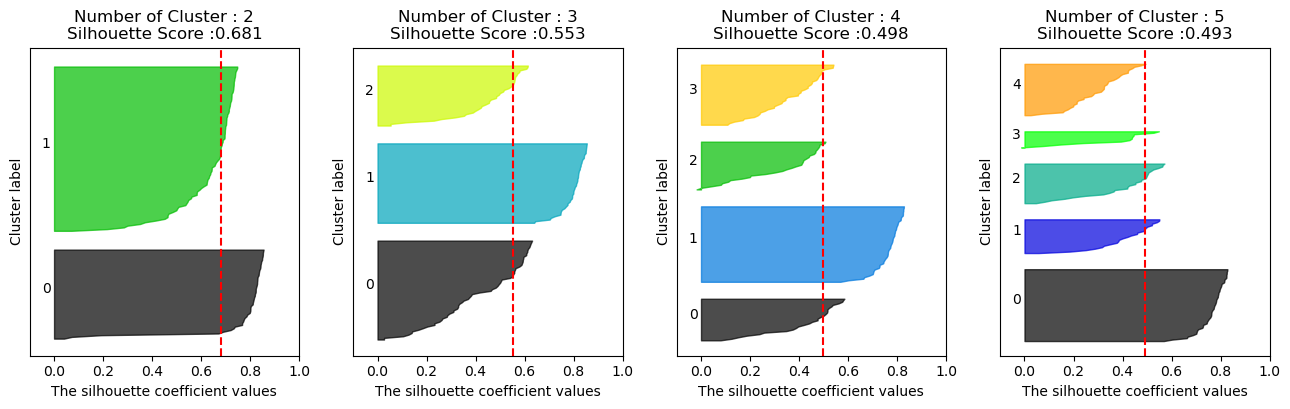

In [ ]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
 
def visualize_silhouette(cluster_lists, X_features):
       
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt 
    import math
       
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
       
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
       
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
           
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
           
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
           
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                            'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
           
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
               
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
               
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                    facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
               
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5], iris.data)